In [9]:
import pandas as pd
from pathlib import Path

csv_path = Path(r"C:\Users\biselli\Desktop\Code\MasterThesis\EBIC_Analysis_Tool\depletion_plots\25B2_P4_80kx_30um\physical_properties_linear_fits.csv")
df = pd.read_csv(csv_path)

# quick checks
print(df.shape)
display(df.head())


(68, 10)


,sample_name,bias_V,profile,left_slope_1_per_um,left_r2,right_slope_1_per_um,right_r2,left_edge_um,right_edge_um,depletion_width_um
0,25B2_P4_80kx_30um_noVb,0.0,1,33.365568,0.990792,16.714066,0.918192,-0.005474,-0.005474,0.000000
1,25B2_P4_80kx_30um_noVb,0.0,2,33.482293,0.995447,-1.365596,0.981814,-0.005474,0.063869,0.069343
2,25B2_P4_80kx_30um_noVb,0.0,3,31.593610,0.996238,4.341284,0.936765,-0.005474,0.005474,0.010949
3,25B2_P4_80kx_30um_noVb,0.0,4,32.685245,0.994641,-1.179586,0.976917,-0.005474,0.067518,0.072993
4,25B2_P4_80kx_30um_noVb,0.0,5,31.706382,0.991657,-1.538079,0.981312,-0.005474,0.052920,0.058394


In [10]:
# remove rows where depletion_width_um is NaN or 0 and update order
mask = df['depletion_width_um'].notna() & (df['depletion_width_um'] != 0)
dropped = (~mask).sum()
df = df[mask].copy()
print(f"Dropped {dropped} rows with NaN or 0 depletion_width_um. Remaining: {len(df)}")

# recompute order to match filtered dataframe
order = sorted(df['bias_V'].dropna().unique())

# remove outliers per bias using the IQR rule (1.5 * IQR)
initial_len = len(df)
before_counts = df.groupby('bias_V')['depletion_width_um'].count()

def _remove_iqr_outliers(group):
    q1 = group['depletion_width_um'].quantile(0.25)
    q3 = group['depletion_width_um'].quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or pd.isna(iqr):
        return group
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return group[group['depletion_width_um'].between(lower, upper)]

df = df.groupby('bias_V', group_keys=False).apply(_remove_iqr_outliers).copy()

removed = initial_len - len(df)
after_counts = df.groupby('bias_V')['depletion_width_um'].count()
per_bias_removed = before_counts.subtract(after_counts, fill_value=0).astype(int)

print(f"Removed {removed} outlier rows total.")
print("Removed per bias_V:")
print(per_bias_removed.to_string())

# recompute order to match filtered dataframe
order = sorted(df['bias_V'].dropna().unique())
display(df.head())

Dropped 3 rows with NaN or 0 depletion_width_um. Remaining: 65
Removed 4 outlier rows total.
Removed per bias_V:
bias_V
0.0    2
0.2    2
0.6    0
1.0    0


C:\Users\biselli\AppData\Local\Temp\ipykernel_25500\1271913377.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('bias_V', group_keys=False).apply(_remove_iqr_outliers).copy()


,sample_name,bias_V,profile,left_slope_1_per_um,left_r2,right_slope_1_per_um,right_r2,left_edge_um,right_edge_um,depletion_width_um
1,25B2_P4_80kx_30um_noVb,0.0,2,33.482293,0.995447,-1.365596,0.981814,-0.005474,0.063869,0.069343
3,25B2_P4_80kx_30um_noVb,0.0,4,32.685245,0.994641,-1.179586,0.976917,-0.005474,0.067518,0.072993
4,25B2_P4_80kx_30um_noVb,0.0,5,31.706382,0.991657,-1.538079,0.981312,-0.005474,0.052920,0.058394
5,25B2_P4_80kx_30um_noVb,0.0,6,35.520830,0.994312,-1.258315,0.975454,-0.005474,0.052920,0.058394
7,25B2_P4_80kx_30um_noVb,0.0,8,35.139835,0.992833,-1.421873,0.992615,-0.009124,0.067518,0.076642


C:\Users\biselli\AppData\Local\Temp\ipykernel_25500\4099409681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bias_V', y='depletion_width_um', data=df, order=order, palette='pastel')


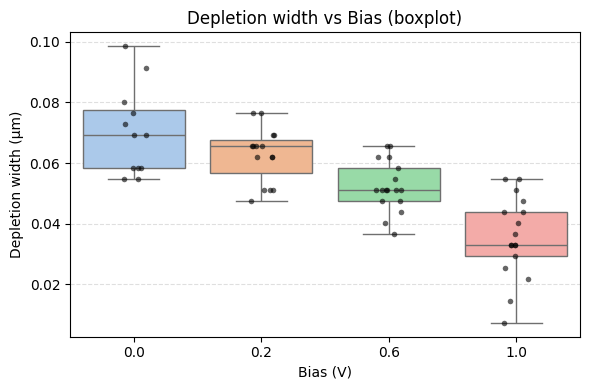

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

order = sorted(df['bias_V'].dropna().unique())

plt.figure(figsize=(6, 4))
sns.boxplot(x='bias_V', y='depletion_width_um', data=df, order=order, palette='pastel')
sns.stripplot(x='bias_V', y='depletion_width_um', data=df, order=order, color='k', size=4, jitter=True, alpha=0.6)
plt.xlabel('Bias (V)')
plt.ylabel('Depletion width (µm)')
plt.title('Depletion width vs Bias (boxplot)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()